### Examen 2

In [3]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

1. Utilice el método de Newton-Raphson para calcular $\sqrt[3]{75}$ con una precisión de cuatro cifras significativas.

0
1
Root = 4.217163326508746


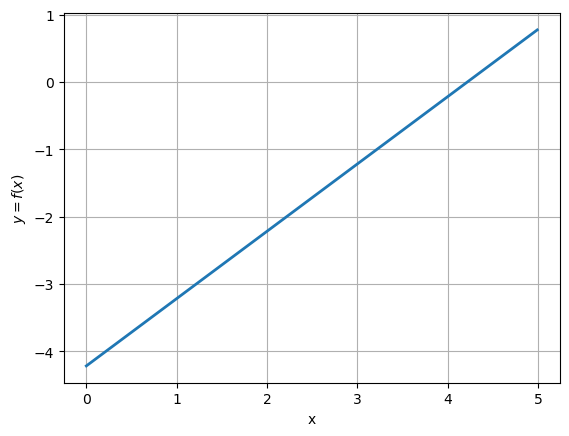

In [11]:
import sympy
import sys
# Graficar funciones
x = np.arange(0.0, 5.0, 0.01)
s = x-(75)**(1/3)
line, = plt.plot(x, s, lw=2)
plt.grid(True)
plt.ylabel('$y = f(x)$')
plt.xlabel('x')

## Modulo Newton-Raphson

def err(string):
  print(string)
  input('Press return to exit')
  sys.exit()

def newtonRaphson(f,df,a,b,tol=1.0e-9):
  from numpy import sign
  fa = f(a)
  if fa == 0.0: return a
  fb = f(b)
  if fb == 0.0: return b
  if sign(fa) == sign(fb): err('La raiz no esta en el intervalo')
  x = 0.5*(a + b)
  for i in range(30):
    print(i)
    fx = f(x)
    if fx == 0.0: return x 
    if sign(fa) != sign(fx): b = x 
    else: a = x
    dfx = df(x)  
    try: dx = -fx/dfx 
    except ZeroDivisionError: dx = b - a 
    x = x + dx 
    if (b - x)*(x - a) < 0.0: 
      dx = 0.5*(b - a)
      x = a + dx 
    if abs(dx) < tol*max(abs(b),1.0): return x 
  print('Too many iterations in Newton-Raphson')
    
def f(x): return x- ((75)**(1/3))
def df(x): return 1
root = newtonRaphson(f,df,0.0,5.0)
print('Root =',root)



2. Encuentra la raíz positiva (real) más pequeña de la ecuación $ x^3 - 3.23x^2 - 5.54x + 9.84 = 0 $ utilizando el método de bisección.

Captura el valor de x1:  1
Captura el valor de x2:  1.5


La raiz mas pequeña positiva es: 1.23000
Numero de bisecciones: 23


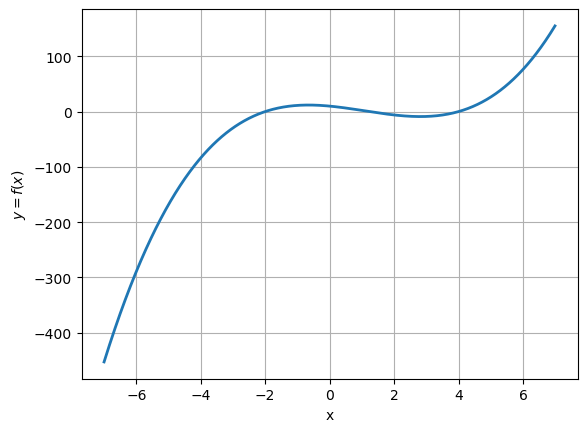

In [36]:
# Graficar funciones
x = np.arange(-7.0, 7.0, 0.01)
s = x**3- 3.23*x**2 - 5.54*x +9.84
line, = plt.plot(x, s, lw=2)

plt.grid(True)

plt.ylabel('$y = f(x)$')
plt.xlabel('x')

def y(x):                    # define la funcion y(x)
  y = x**3- 3.23*x**2 - 5.54*x +9.84
  return y

x1 = float(input('Captura el valor de x1: ')) # peticion de valor x1
x2 = float(input('Captura el valor de x2: ')) # peticion de valor x2
y1 = y(x1)                                    # evalua la funcion y(x1)
y2 = y(x2)                                    # evalua la funcion y(x1)

if y1*y2 > 0:                                 # prueba si los signos son iguales
  print('No hay raices en el intervalo')
  exit

for i in range(100):
  xh = (x1+x2)/2
  yh = y(xh)                                  # evalua la funcion y(xh)
  y1 = y(x1)                                  # evalua la funcion y(x1)
  if abs(y1) < 1.0e-6:
    break
  elif y1*yh < 0:
    x2 = xh
  else:
    x1 = xh
print('La raiz mas pequeña positiva es: %.5f' % x1)
print('Numero de bisecciones: %d' % (i+1))

3. Utilice aproximaciones por diferencias finitas para calcular $f'(2.36)$ y $f''(2.36)$.

| x     | 2.36    | 2.37    | 2.38    | 2.39    |
|-------|---------|---------|---------|---------|
| f(x) | 0.85866 | 0.86289 | 0.86710 | 0.87129 |

In [39]:
#con:
h=0.01
x=2.36
#primer derivada
der1=(0.86289-0.85866)/h

#segunda derivada
der2=(0.86710-(2*0.86289)+0.85866)/(h**2)


def d2ff(x,h,f,n): #Segunda derivada de f con aproximación forward con n decimales
  d2ff=(f(x+2*h,n)-2*f(x+h,n)+f(x,n))/(h**2)
  return d2ff

print("primer derivada:",der1,"segunda derivada:",der2)

primer derivada: 0.4230000000000067 segunda derivada: -0.20000000000131024


4. Evalúe $\int_{0}^{1}\frac{\sin x}{\sqrt{x}}dx$ utilizando la regla trapezoidal recursiva. (Pista: Utilice una transformación de la variable para eliminar la singularidad en $x = 0$.)

In [28]:

def trapecio_recursiva(f,a,b,Iold,k):
  if k == 1: Inew = (f(a) + f(b))*(b - a)/2.0
  else:
    n = 2**(k -2 ) # numero de nuevos puntos
    h = (b - a)/n # espaciamiento de nuevos puntos
    x = a + h/2.0
    sum = 0.0
    for i in range(n):
      sum = sum + f(x)
      x = x + h
      Inew = (Iold + h*sum)/2.0
  return Inew

#con cambio de variable x=t**2
import math
def f(x): return (2*np.sin(x**2))
Iold = 0.0
for k in range(1,21):
  Inew = trapecio_recursiva(f,0.0,1.0,Iold,k)
  if (k > 1) and (abs(Inew - Iold)) < 1.0e-6: break
  Iold = Inew

print('Integral =',Inew)
print('n Panels =',2**(k-1))


Integral = 0.6205367752042759
n Panels = 1024
